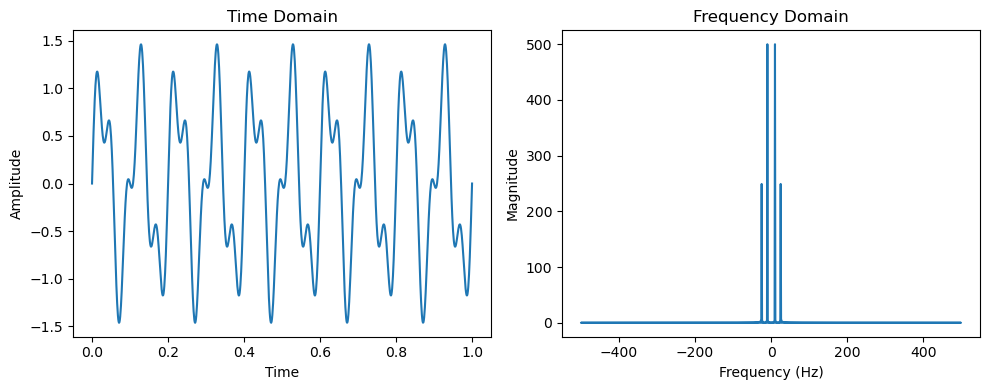

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 시간 변수 생성
t = np.linspace(0, 1, 1000)  # 0부터 1까지의 범위에서 1000개의 시간 점 생성

# 신호 생성
f1 = 10  # 주파수 10Hz
f2 = 25  # 주파수 25Hz
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)  # 10Hz와 25Hz의 주파수 성분을 가진 신호

# FFT 수행
fft_result = np.fft.fft(signal)

# 주파수 계산
sampling_rate = 1 / (t[1] - t[0])  # 샘플링 주파수
frequencies = np.fft.fftfreq(len(signal), 1 / sampling_rate)  # 주파수 벡터 생성

# 결과 그래프 그리기
plt.figure(figsize=(10, 4))

# 시간 도메인 신호 그리기
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Domain')

# 주파수 도메인 신호 그리기
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain')

plt.tight_layout()
plt.show()

In [ ]:
import torch

# 다변량 센서 데이터 생성 (가속도 데이터)
sensor_data = torch.tensor([
    [0.5, 0.3, 0.2],  # x축 가속도
    [0.7, 0.1, 0.4],  # y축 가속도
    [0.9, 0.6, 0.8]   # z축 가속도
])

# 푸리에 변환 수행
fft_result = torch.fft.fft(sensor_data, dim=1)

import matplotlib.pyplot as plt

# 주파수 도메인에서의 주파수 성분 표현
power_spectrum = torch.abs(fft_result) ** 2

# 주파수 성분 그래프 그리기
plt.plot(power_spectrum[0], label='x-axis')  # x
